In [1]:
import pandas as pd

# 'data.csv' agar khali dikha raha hai toh ye try kar
# encoding='latin1' ya 'utf-8' se errors solve ho jate hain
df = pd.read_csv('data.csv', encoding='latin1')

# Agar file mein columns commas ki jagah tabs se separated hain toh ye:
# df = pd.read_csv('data.csv', sep='\t') 

df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [3]:
print(df.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')


In [4]:
# 1. RAM Cleaning 🧹
# Pehle check karte hain ki 'Ram' column hai ya nahi
if 'Ram' in df.columns:
    # Agar Ram abhi bhi text (object) hai, tabhi clean karenge
    if df['Ram'].dtype == 'object':
        df['Ram'] = df['Ram'].str.replace('GB', '')
        df['Ram'] = df['Ram'].astype('int32')
        print("✅ RAM clean ho gayi!")
    else:
        print("😎 RAM pehle se clean hai (Number ban chuka hai).")

# 2. ROM Cleaning 🧹
# ROM mein '1TB' aur '512GB' jaisi cheezein hoti hain
if 'ROM' in df.columns:
    if df['ROM'].dtype == 'object':
        # 1TB ko 1000GB banate hain (Jugaad: TB hata ke 000 laga do)
        df['ROM'] = df['ROM'].str.replace('TB', '000') 
        df['ROM'] = df['ROM'].str.replace('GB', '')
        df['ROM'] = df['ROM'].astype('int32')
        print("✅ ROM clean ho gayi!")
    else:
        print("😎 ROM pehle se clean hai.")

# 3. Final Check 🧐
# Ab dekhte hain data kaisa dikh raha hai
print("\nBache hue columns:")
print(df.columns)
df.info()

😎 RAM pehle se clean hai (Number ban chuka hai).
✅ ROM clean ho gayi!

Bache hue columns:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    int32  
 9   Ram_type  

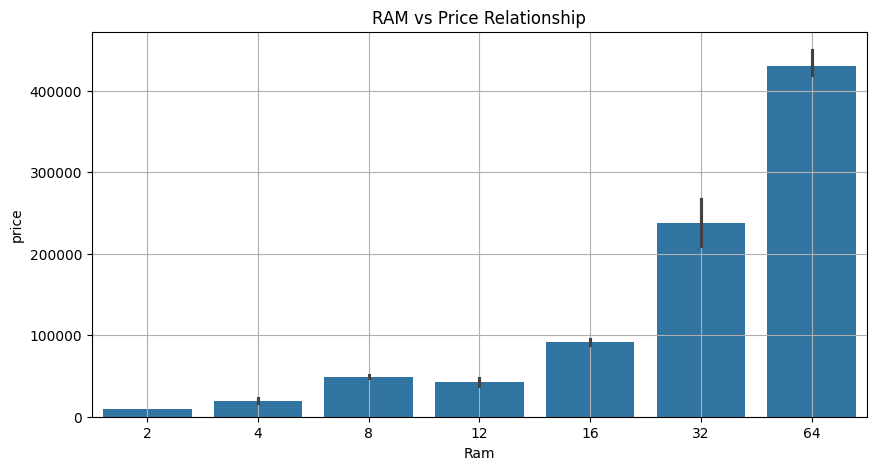

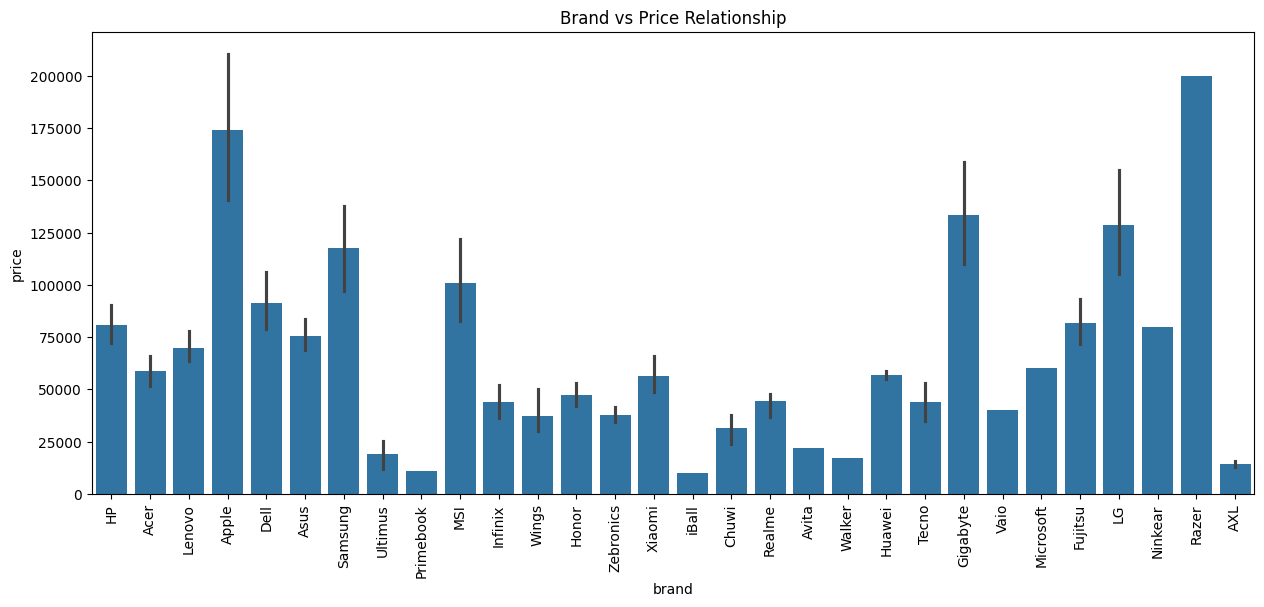

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graph 1: RAM vs Price (Kya RAM badhne se paisa badh raha hai?)
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Ram'], y=df['price'])
plt.title('RAM vs Price Relationship')
plt.grid(True)
plt.show()

# Graph 2: Brand vs Price (Kaunsi company sabse mehngi hai?)
plt.figure(figsize=(15, 6))
sns.barplot(x=df['brand'], y=df['price'])
plt.xticks(rotation='vertical') # Naam tedhe kar diye taaki saaf dikhe
plt.title('Brand vs Price Relationship')
plt.show()

In [7]:
# 1. Sirf zaroori columns select karte hain
df_clean = df[['brand', 'Ram', 'ROM', 'display_size', 'OS', 'price']]

# 2. OS ko simple banate hain (Windows, Mac, Others)
def clean_os(os_name):
    if 'Windows' in os_name:
        return 'Windows'
    elif 'Mac' in os_name:
        return 'Mac'
    else:
        return 'Other'

df_clean['OS'] = df_clean['OS'].apply(clean_os)

# 3. One-Hot Encoding (Magic Step 🪄)
# Ye text columns ko 0 aur 1 mein badal dega
df_final = pd.get_dummies(df_clean)

# Result dekhte hain
print("Pehle columns the:", df_clean.shape[1])
print("Ab columns hain:", df_final.shape[1])
df_final.head()

Pehle columns the: 6
Ab columns hain: 37


C:\Users\Rajesh-Sharma\AppData\Local\Temp\ipykernel_8784\1692425515.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['OS'] = df_clean['OS'].apply(clean_os)


,Ram,ROM,display_size,price,brand_AXL,brand_Acer,brand_Apple,brand_Asus,brand_Avita,brand_Chuwi,...,brand_Ultimus,brand_Vaio,brand_Walker,brand_Wings,brand_Xiaomi,brand_Zebronics,brand_iBall,OS_Mac,OS_Other,OS_Windows
0,8,512,15.6,49900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,8,512,15.6,39900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,8,512,14.0,26990,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,16,512,14.0,59729,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,8,256,13.3,69990,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Features (X) aur Target (y) alag karna
# X = Saara data (Price ko chhod kar)
# y = Sirf Price (Jo humein predict karna hai)
X = df_final.drop(columns=['price'])
y = df_final['price']

# 2. Train-Test Split (Data ko todna)
# test_size=0.15 ka matlab hai 15% data exam ke liye rakha hai
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# 3. Model Banana aur Sikhana (Fit karna)
lr = LinearRegression()
lr.fit(X_train, y_train)

# 4. Model ka Test lena
y_pred = lr.predict(X_test)

# 5. Result dekhna (Accuracy Check)
print("R2 Score (Accuracy):", r2_score(y_test, y_pred))

R2 Score (Accuracy): 0.5521884084331519


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

# 1. Data Todna
X = df_clean.drop(columns=['price'])
y = df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# 2. Pipeline Banana (Modified 🛠️)
# Change: handle_unknown='ignore' add kiya taaki naye brands se error na aaye
# Note: drop='first' hata diya kyunki 'ignore' ke saath wo kabhi-kabhi ladta hai
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0, 4])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# 3. Model Train karna
pipe.fit(X_train, y_train)

# 4. Check karna
y_pred = pipe.predict(X_test)
print("Final R2 Score:", r2_score(y_test, y_pred))

# 5. Export
pickle.dump(pipe, open('model.pkl', 'wb'))
pickle.dump(df_clean, open('df.pkl', 'wb'))

print("Badhai ho! 'model.pkl' aur 'df.pkl' save ho gayi! 🎉")

Final R2 Score: 0.5521884084331662
Badhai ho! 'model.pkl' aur 'df.pkl' save ho gayi! 🎉
